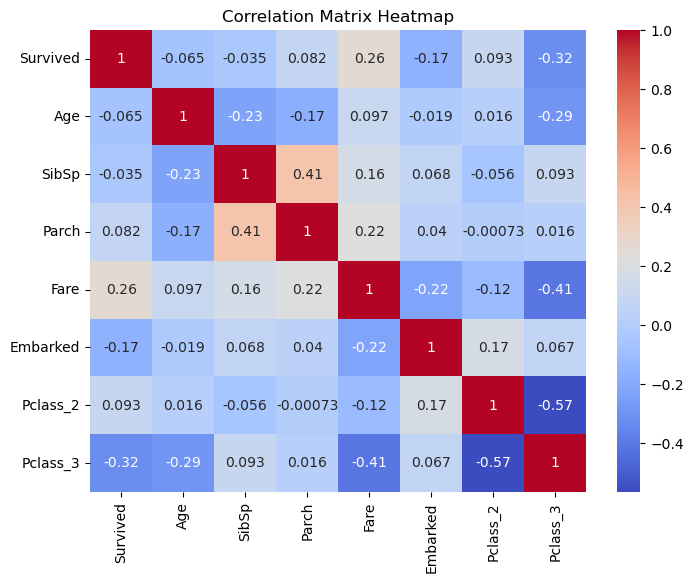

Confusion Matrix:
 [[78 27]
 [35 39]]
Accuracy: 0.6536312849162011


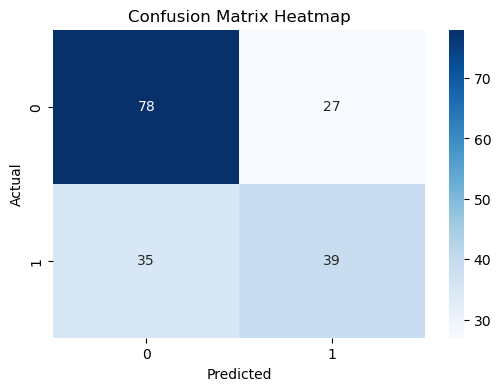

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\Ramachandra\OneDrive\Desktop\ML Lab\Titanic-Dataset.csv")
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Handle missing values
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])

# Fill missing 'Embarked' values with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode 'Embarked' column
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Normalize numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Encode the 'Pclass' column using one-hot encoding
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)

# Plot the correlation matrix heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Split the data into train and test sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

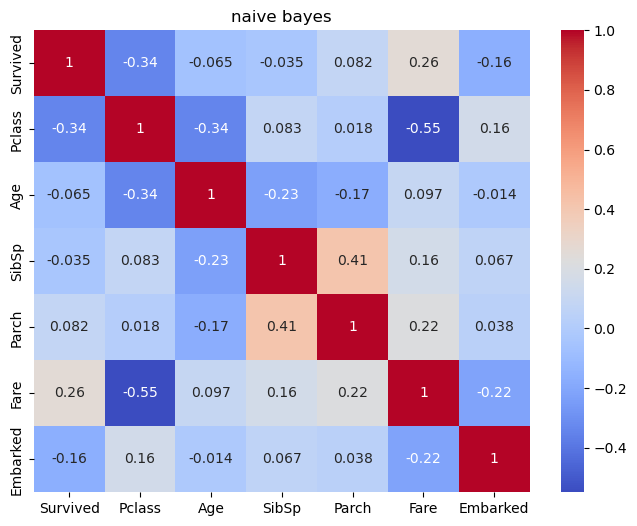

predictions:
[0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1]
confusion matrix is :  [[94 19]
 [39 27]]
accuracy is: 0.6759776536312849
heatmap for confusion matrix


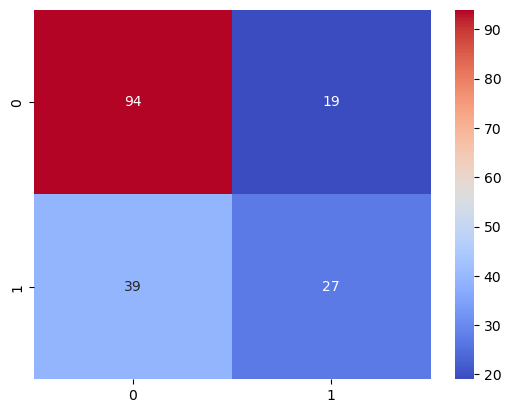

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler

df=pd.read_csv('./Titanic-Dataset.csv')
df=df[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked']]

imputer=SimpleImputer(strategy='median')
df[['Age','Fare']]=imputer.fit_transform(df[['Age','Fare']])


df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])

scaler=StandardScaler()
df[['Age','Fare']]=scaler.fit_transform(df[['Age','Fare']])

corr_matrix=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("naive bayes")
plt.show()

X=pd.get_dummies(df.drop('Survived',axis=1),drop_first=True)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

nb=GaussianNB()
nb.fit(X_train,y_train)

y_pred=nb.predict(X_test)
print("predictions:")
print(y_pred)

confusion_mat=confusion_matrix(y_test,y_pred)
print("confusion matrix is : ",confusion_mat)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy is:",accuracy)

print("heatmap for confusion matrix")
sns.heatmap(confusion_mat,annot=True,cmap='coolwarm')
plt.show()
